    Logic - 9:20 bank nifty index, 
    At ATM, sell call and put. 
    Exit strategy if 40% SL hit at any side, or in the day end 3:15 pm
    
    If Call SL hit, then bring put SL to cost. 
    If put SL hits, then bring call SL to cost. 
    Then continue the trade till 3:15 or any other SL hit. 

In [65]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [66]:
import pandas as pd
import numpy as np
from datetime import datetime
import glob

In [67]:
import os
# data_path = '/home/bps3/Debashis/Data/Option Weekly data 2022 Updated - Himanshu/'
data_path = "C:/Users/Hp/OneDrive/Documents/Desktop/10june/weekly_data/"
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(data_path, x)),
                        os.listdir(data_path) ) )
len(list_of_files)
list_of_files

['WEEK_01_31DEc_06_Jan2022_WEEKLY_expiry_data_NF_AND_BNF_Options.csv',
 'WEEK_02_07_13_Jan_22_WEEKLY_expiry_data_VEGE_NF_AND_BNF_Options.csv',
 'WEEK_03_14_20_Jan_22_WEEKLY_expiry_data_VEGE_NF_AND_BNF_Options.csv']

In [68]:
df = pd.read_csv(data_path+list_of_files[0])
df 

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,BANKNIFTY,31-12-2021 09:15:00,35114.40,35225.70,35113.80,35220.00,1,0
1,BANKNIFTY,31-12-2021 09:16:00,35218.80,35285.80,35218.80,35276.90,1,0
2,BANKNIFTY,31-12-2021 09:17:00,35289.30,35320.80,35275.70,35311.90,1,0
3,BANKNIFTY,31-12-2021 09:18:00,35311.60,35333.50,35301.40,35307.90,1,0
4,BANKNIFTY,31-12-2021 09:19:00,35311.20,35329.60,35302.30,35329.60,1,0
...,...,...,...,...,...,...,...,...
412675,USDINR-I,06-01-2022 15:26:00,74.66,74.66,74.65,74.65,8532,2189496
412676,USDINR-I,06-01-2022 15:27:00,74.65,74.66,74.65,74.66,4083,2184273
412677,USDINR-I,06-01-2022 15:28:00,74.66,74.66,74.65,74.66,10849,2184273
412678,USDINR-I,06-01-2022 15:29:00,74.66,74.66,74.65,74.66,5655,2184273


In [69]:
for file_name in list_of_files[:1]:
    print(file_name)
    df = pd.read_csv(data_path+file_name)
    print(df.head())

WEEK_01_31DEc_06_Jan2022_WEEKLY_expiry_data_NF_AND_BNF_Options.csv
      Ticker            Date/Time     Open     High      Low    Close  Volume  \
0  BANKNIFTY  31-12-2021 09:15:00  35114.4  35225.7  35113.8  35220.0       1   
1  BANKNIFTY  31-12-2021 09:16:00  35218.8  35285.8  35218.8  35276.9       1   
2  BANKNIFTY  31-12-2021 09:17:00  35289.3  35320.8  35275.7  35311.9       1   
3  BANKNIFTY  31-12-2021 09:18:00  35311.6  35333.5  35301.4  35307.9       1   
4  BANKNIFTY  31-12-2021 09:19:00  35311.2  35329.6  35302.3  35329.6       1   

   Open Interest  
0              0  
1              0  
2              0  
3              0  
4              0  


In [70]:
# data_path = '/home/bps3/Debashis/Data/Option Weekly data 2022 Updated/'
file_names = glob.glob(data_path+'*.csv')
len(file_names)
file_names[0]

'C:/Users/Hp/OneDrive/Documents/Desktop/10june/weekly_data\\WEEK_01_31DEc_06_Jan2022_WEEKLY_expiry_data_NF_AND_BNF_Options.csv'

In [71]:
def convert(date_time):
    format = '%d-%m-%Y %H:%M:%S'  # The format
    datetime_str = datetime.strptime(date_time, format)
    #print(datetime_str)
    return datetime_str

In [72]:
def get_atm(spot):
    # print current ATM strike price for Bank Nifty
    strike = spot%100

    if strike>=50:
        strike = int((spot//100)*100)+100

    if strike<50:
        strike =int(spot//100)*100
    return strike


In [73]:
get_atm(44855)

44900

In [74]:
straddle_flag = 0
day_end_flag = 0
one_time_flag = 0
call_sl_hit_flag = 0
put_sl_hit_flag = 0

std_call_ltp = 0
std_put_ltp = 0
std_call_sl = 0
std_put_sl = 0
day_pnl = 0
strategy_cum_pnl = 0
trade_num = 0


# lst_each_time, lst_ce_ltp, lst_pe_ltp = [], [], []
# lst_call_m2m, lst_put_m2m, all_m2m =  [], [], []
# lst_day_pnl, lst_cum_pnl = [], []
# lst_status, remarks = [], []


temp_report = {'entry_time':None,  'index_ltp' : None, 'call_strike':None, 'put_strike':None,  
               'entry_ce_ltp':None, 'entry_pe_ltp':None, 'call_sl':None, 'put_sl':None,
               'exit_time_call':None, 'exit_time_put':None, 'exit_ce_ltp':None, 'exit_pe_ltp':None,
               'call_pnl':0, 'put_pnl':0,
               'day_pnl':0, 'cumulative_pnl':0, 'remark':None}
print('Temporary report: ', temp_report)

final_result = {}
# df_report_m2m = pd.DataFrame(columns=['Time', 'Call ltp', 'Put ltp', 'Call m2m', 'Put m2m', 'm2m', 'Day pnl', 'Cum pnl','status'])
# df_report_m2m

Temporary report:  {'entry_time': None, 'index_ltp': None, 'call_strike': None, 'put_strike': None, 'entry_ce_ltp': None, 'entry_pe_ltp': None, 'call_sl': None, 'put_sl': None, 'exit_time_call': None, 'exit_time_put': None, 'exit_ce_ltp': None, 'exit_pe_ltp': None, 'call_pnl': 0, 'put_pnl': 0, 'day_pnl': 0, 'cumulative_pnl': 0, 'remark': None}


In [75]:
# dict_m2m = {}  # we can save m2m according to datetime as primary key
# temp_m2m_report = {"datetime":None, 
#            "ce_m2m":None, 
#            "pe_m2m":None, 
#            "ce_strike":None, 
#            "pe_strike":None
#            }
# temp_m2m_report

In [76]:
# dict_trades = {}
# temp_trades_report = {"datetime":None, 
#                      "ce_strike":None,
#                      "pe_strike":None,
#                      "ce_status":None,
#                      "pe_status":None,
#                      "ce_executed_price":None,
#                      "pe_executed_price":None
#                      }
# # different status - closed, call sold, put sold, ce square off, pe square off

In [77]:
# dict_results = {}
# temp_results_report = {
#     "Date" : None,
#     "Max_call_m2m" : None,
#     "Time_at_max_call_M2M" : None,
#     "Max_put_m2m" : None,
#     "Time_at_max_put_M2M" : None,
#     "Min_call_M2M" : None,
#     "Time_at_min_call_M2M" : None,
#     "Min_put_M2M" : None,
#     "Time_at_min_put_M2M" : None,
#     "Total_P&L" : None
# }
# temp_results_report

In [78]:
# for file_name in list_of_files[:1]:
#     df_options_data = pd.read_csv(data_path+file_name, low_memory=False)
#     print(df_options_data.head())
# if not temp_report['put_pnl']:
#     print('hi')

In [79]:
# date = datetime.today()
# print(date)
# start_time = str(date)[:10]+" 09:20"
# end_time = str(date)[:10]+" 15:10"
# # day_end = str(date)[:10]+" 15:10"
# print('Start time: ', start_time, 'End time: ',end_time)
# intraday_times = [str(x) for x in pd.date_range(start= start_time, end = end_time, freq='min')]
# for i in intraday_times[:1]:
#     print(i)

In [98]:
d1 = pd.read_csv(data_path+list_of_files[0])
d2 = d1[d1['Ticker']=='BANKNIFTY']
d2

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,BANKNIFTY,31-12-2021 09:15:00,35114.4,35225.7,35113.8,35220.0,1,0
1,BANKNIFTY,31-12-2021 09:16:00,35218.8,35285.8,35218.8,35276.9,1,0
2,BANKNIFTY,31-12-2021 09:17:00,35289.3,35320.8,35275.7,35311.9,1,0
3,BANKNIFTY,31-12-2021 09:18:00,35311.6,35333.5,35301.4,35307.9,1,0
4,BANKNIFTY,31-12-2021 09:19:00,35311.2,35329.6,35302.3,35329.6,1,0
...,...,...,...,...,...,...,...,...
1872,BANKNIFTY,06-01-2022 15:26:00,37460.6,37471.6,37456.9,37466.1,0,0
1873,BANKNIFTY,06-01-2022 15:27:00,37468.3,37480.9,37461.7,37469.4,0,0
1874,BANKNIFTY,06-01-2022 15:28:00,37470.6,37491.1,37460.9,37487.3,0,0
1875,BANKNIFTY,06-01-2022 15:29:00,37482.3,37495.9,37467.5,37470.4,0,0


In [63]:
d1 = pd.read_csv(data_path+list_of_files[0])
new_dates = []
for dates in d1["Date/Time"]:
    new_dates.append(convert(dates))
new_dates[0]

datetime.datetime(2021, 12, 31, 9, 15)

In [64]:
type(new_dates[0])

datetime.datetime

In [91]:
for file_name in list_of_files[:]:
    #df_options_data = pd.read_csv(file_name, low_memory=False)
    df_options_data = pd.read_csv(data_path+file_name, low_memory=False)

    # Changed date time format
    new_dates = []
    for x in df_options_data['Date/Time'].values[:]:
        new_dates.append(convert(x))
    df_options_data['Date/Time'] = new_dates
    df_options_data.index = df_options_data['Date/Time']
#     print(df_options_data)
    
    # Fetch Bank Nifty data
    df_bn_index = df_options_data[df_options_data['Ticker']=='BANKNIFTY']
    
    # For any week, this captures all the distinct dates in order
    week_days = []
    for date, candle in df_bn_index[:].iterrows():
    #     print(date[:10])
        week_days.append(str(date)[:10])

    week_days2 = []
    for x in week_days:
        if x not in week_days2:
            week_days2.append(x)
    print('Week days: ', week_days2)
    
    format = '%Y-%m-%d'
    unique_days = []
    for x in week_days2:
        temp_date = datetime.strptime(x, format)
        unique_days.append(temp_date)
    [print(x) for x in unique_days]
    
    for date in unique_days[:]:
        try:
            start_time = str(date)[:10]+" 09:20"
            end_time = str(date)[:10]+" 15:16"
            day_end = str(date)[:10]+" 15:10"
            print('Start time: ', start_time, 'End time: ',end_time)
            intraday_times = [str(x) for x in pd.date_range(start= start_time, end = end_time, freq='min')]

            # Fetch bank nifty index 9:20 close price
            underlying_data = df_bn_index.loc[intraday_times[0]:intraday_times[0]]
            index_ltp = underlying_data['Close'].values[0]
            temp_report["index_ltp"] = index_ltp
            print('Index LTP: ', index_ltp)

            # Find ATM strike with this index LTP
            atm_strike = get_atm(index_ltp)
            print('ATM strike: ', atm_strike)

            # Build the call and put strike price - according to the format
            atm_call = 'BANKNIFTY'+str(atm_strike)+'CE'
            atm_put = 'BANKNIFTY'+str(atm_strike)+'PE'
            print(f'ATM call strike: {atm_call}, ATM put strike: {atm_put}')
            temp_report['call_strike'] = atm_call
            temp_report['put_strike'] = atm_put

            # Find call and put data with this strike price
            df_call = df_options_data[df_options_data['Ticker']== atm_call]
            df_call.index = df_call['Date/Time']
            #print(df_call.head())
            if df_call.empty:
                print('Call data not received')

            df_put = df_options_data[df_options_data['Ticker'] == atm_put]
            df_put.index = df_put['Date/Time'] 
            #print(df_put.head()) 
            if df_put.empty:
                print('Put data not received')
                
            #temp_results_report['Date'] = date.date()
            #print('Date: ', temp_results_report['Date'])
            
            max_call_m2m = 0
            max_put_m2m = 0
            min_call_m2m = 0
            min_put_m2m = 0
            call_sl_hit_flag = 0
            put_sl_hit_flag = 0

            # Loop for the whole day long
            for i in range(len(intraday_times[:])-1):
                #print(intraday_times[i])
                call_data = df_call.loc[intraday_times[i]:intraday_times[i]]
                put_data = df_put.loc[intraday_times[i]:intraday_times[i]]
                call_ltp = call_data['Close'].values[0]
                put_ltp = put_data['Close'].values[0]
                #print(f"Time: {intraday_times[i]}, Call ltp: {call_ltp}, Put ltp: {put_ltp}")
                #temp_m2m_report['datetime'] = intraday_times[i]
                #temp_trades_report['datetime'] = intraday_times[i]
                #if straddle_flag == 0:
                    #temp_m2m_report['ce_strike'] = None
                    #temp_m2m_report['pe_strike'] = None
                    #temp_m2m_report['ce_m2m'] = 0
                    #temp_m2m_report['pe_m2m'] = 0
                    #temp_trades_report['ce_status'] = 'Closed'
                    #temp_trades_report['pe_status'] = 'Closed'
                #else:
                    #temp_m2m_report['ce_strike'] = temp_report['call_strike']
                    #temp_m2m_report['pe_strike'] = temp_report['put_strike']
                    #temp_m2m_report['ce_m2m'] = round(call_ltp - temp_report['entry_ce_ltp'], 2)
                    #temp_m2m_report['pe_m2m'] = round(put_ltp - temp_report['entry_ce_ltp'], 2)
                    #temp_trades_report['ce_strike'] = atm_call
                    #temp_trades_report['pe_strike'] = atm_put
                    #temp_trades_report['ce_status'] = 'Call sell continue'
                    #temp_trades_report['pe_status'] = 'Put sell continue'
            

                # This process continues till day end. 
#                 if day_end_flag == 0:
#                     lst_each_time.append(intraday_times[i])
#                     lst_ce_ltp.append(call_ltp)
#                     lst_pe_ltp.append(put_ltp)
#                     lst_day_pnl.append(day_pnl)
#                     lst_cum_pnl.append(week_cum_pnl)
                    

                # Enter into straddle at 9:20 and exit at 15:20
                # This is a one time entry strategy. After SL, we'll stop trading for that day
                if ( (straddle_flag == 0) and (day_end_flag == 0) and (one_time_flag == 0) ):
                    print('Entry to straddle at: ', intraday_times[i])
                    print(f'Straddle Call price {call_ltp}, put price {put_ltp}')
                    std_call_ltp = call_ltp
                    std_put_ltp = put_ltp
                    std_call_sl =1.4 * std_call_ltp
                    std_put_sl = 1.4 * std_put_ltp
                    straddle_flag = 1
                    one_time_flag = 1
                    temp_report['entry_time'] = intraday_times[i]
                    temp_report['entry_ce_ltp'] = call_ltp
                    temp_report['entry_pe_ltp'] = put_ltp
                    temp_report['call_sl'] = round(1.4 * std_call_ltp, 2)
                    temp_report['put_sl'] = round(1.4 * std_put_ltp, 2)
                    #temp_trades_report['ce_status'] = "Call Sold"
                    #temp_trades_report['pe_status'] = "Put Sold"
                    #temp_trades_report['ce_executed_price'] = call_ltp
                    #temp_trades_report['pe_executed_price'] = put_ltp
                    print('Today report after trade entry: ', temp_report)
                    trade_num += 1

                if ( (straddle_flag == 1) and (day_end_flag == 0) and (one_time_flag != 0)):
                    # check for SL, if any ltp reaches 40%, then square off both leg
                    call_m2m = round(std_call_ltp - call_ltp, 2)
                    put_m2m = round(std_put_ltp - put_ltp, 2)
                    #all_m2m.append(round(call_m2m + put_m2m, 2))
                    
                    #print(f"Call m2m: {call_m2m}, put m2m: {put_m2m}")
                    #print(f"Time: {intraday_times[i]}, Call ltp: {call_ltp}, Put ltp: {put_ltp}")
#                     if call_m2m >= max_call_m2m:
#                         max_call_m2m = call_m2m
#                         temp_results_report['Max_call_m2m'] = max_call_m2m
#                         temp_results_report['Time_at_max_call_M2M'] = intraday_times[i]
#                         #print(f"Max call m2m {temp_results_report['Max_call_m2m']}  {temp_results_report['Time_at_max_call_M2M'] }")
                
#                     if call_m2m <= min_call_m2m:
#                         min_call_m2m = call_m2m
#                         temp_results_report['Min_call_M2M'] = min_call_m2m
#                         temp_results_report['Time_at_min_call_M2M'] = intraday_times[i]
#                         #print(f"Min call m2m {temp_results_report['Min_call_M2M']}, {temp_results_report['Time_at_min_call_M2M']}")
                
#                     if put_m2m > max_put_m2m:
#                         max_put_m2m = put_m2m
#                         temp_results_report['Max_put_m2m'] = max_put_m2m
#                         temp_results_report['Time_at_max_put_M2M'] = intraday_times[i]
#                         #print(f"Max put m2m: {temp_results_report['Max_put_m2m']}, {temp_results_report['Time_at_max_put_M2M']}")
                    
#                     if put_m2m <= min_put_m2m:
#                         min_put_m2m = put_m2m
#                         temp_results_report['Min_put_M2M'] = min_put_m2m
#                         temp_results_report['Time_at_min_put_M2M'] = intraday_times[i]
                        #print(f"Min put m2m: {temp_results_report['Min_put_M2M']}, {temp_results_report['Time_at_min_put_M2M']}")
                

                    # Call SL hit
                    if ( (call_ltp >= temp_report['call_sl']) and (call_sl_hit_flag == 0) ): 
                        # call sl hit
                        call_sl_hit_flag = 1
                        print(f"Call sl hit, time: {intraday_times[i]}, call m2m: {call_m2m}, put m2m: {put_m2m}")
                        print(f"call ltp: {call_ltp}, put ltp: {put_ltp}")
                        #day_pnl += round((std_call_ltp - call_ltp), 2)
                        
                        if put_sl_hit_flag == 0:  
                            temp_report['put_sl'] = temp_report['entry_pe_ltp'] # adjust put sl to entry cost
                            temp_report['exit_ce_ltp'] = call_ltp
                            temp_report['call_pnl'] = round(temp_report['entry_ce_ltp'] - temp_report['exit_ce_ltp'], 2)
                            #temp_report['day_pnl'] = temp_report['call_pnl']
                            temp_report['exit_time_call'] = intraday_times[i]
                            print(f"Put sl updated to: {temp_report['put_sl']}")
                            #print('Status: ', temp_report)
                            
                        else:
                            temp_report['exit_ce_ltp'] = call_ltp
                            temp_report['call_pnl'] = round(temp_report['entry_ce_ltp'] - temp_report['exit_ce_ltp'], 2)
                            temp_report['day_pnl'] = round(temp_report['call_pnl'] + temp_report['put_pnl'], 2)
                            temp_report['exit_time_call'] = intraday_times[i]
                            temp_report['remark'] = 'Put SL and then Call SL hit'
                            print(f"Squareoff both legs, pnl: {temp_report['day_pnl']}")
                            straddle_flag = 0
                            #print('Status: ', temp_report)
                        
                        
                        std_call_ltp = 0
                        std_put_ltp = 0
                        #temp_trades_report['ce_status'] = "Call SL hit"
                        #temp_trades_report['pe_status'] = "Put SL adjusted"
                        #temp_trades_report['ce_executed_price'] = call_ltp
                        #temp_trades_report['pe_executed_price'] = put_ltp
                        #print('After call SL hit: ', temp_report)
                        
                    #if (call_sl_hit_flag == 1):
                        # print status of put side leg
                        #print(f"Updated put SL: {temp_report['put_sl']}")

                    # Put SL hit
                    if ( (put_ltp >= temp_report['put_sl']) and (put_sl_hit_flag == 0) ):
                        # put sl hit
                        put_sl_hit_flag = 1
                        print(f"Put sl hit, time: {intraday_times[i]}, call m2m: {call_m2m}, put m2m: {put_m2m}")
                        print(f"call ltp: {call_ltp}, put ltp: {put_ltp}")
                        
                        if call_sl_hit_flag == 0:  
                            temp_report['call_sl'] = temp_report['entry_ce_ltp'] # Adjust call SL to entry price
                            temp_report['exit_pe_ltp'] = put_ltp
                            temp_report['put_pnl'] = round(temp_report['entry_pe_ltp'] - temp_report['exit_pe_ltp'], 2)
                            #temp_report['day_pnl'] = temp_report['call_pnl'] + temp_report['put_pnl']
                            temp_report['exit_time_put'] = intraday_times[i]
                            print(f"Call sl updated to : {temp_report['call_sl']}")
                            #print('Status: ', temp_report)
                        else:
                            temp_report['exit_pe_ltp'] = put_ltp
                            temp_report['put_pnl'] = round(temp_report['entry_pe_ltp'] - temp_report['exit_pe_ltp'], 2)
                            temp_report['day_pnl'] = round(temp_report['call_pnl'] + temp_report['put_pnl'], 2)
                            temp_report['exit_time_put'] = intraday_times[i]
                            temp_report['remark'] = 'Call SL and then Put SL hit'
                            print(f"Squareoff both legs, pnl: {temp_report['day_pnl']}")
                            #print('Status: ', temp_report)
                            straddle_flag = 0
                        
                        std_call_ltp = 0
                        std_put_ltp = 0
                        #temp_trades_report['ce_status'] = "Call Squared Off"
                        #temp_trades_report['pe_status'] = "Put SL hit"
                        #temp_trades_report['ce_executed_price'] = call_ltp
                        #temp_trades_report['pe_executed_price'] = put_ltp
                        #print('After put SL hit: ', temp_report)
                        
                    #if (put_sl_hit_flag == 1):
                        # Print status of Call side leg
                        #print(f"Updated call SL: {temp_report['call_sl']}")
                        

                    # Day end Exit
                    if ( (intraday_times[i] >= day_end) and (straddle_flag != 0)):
                        print(f'Day end exit, time: {intraday_times[i]}')
                        print(f"call ltp: {call_ltp}, put ltp: {put_ltp}")
                        if call_sl_hit_flag == 1:
                            temp_report['exit_time_put'] = intraday_times[i]
                            temp_report['exit_pe_ltp'] = put_ltp
                            temp_report['put_pnl'] = round(temp_report['entry_pe_ltp'] - temp_report['exit_pe_ltp'], 2)
                            temp_report['day_pnl'] = round(temp_report['call_pnl'] + temp_report['put_pnl'], 2)
                            temp_report['remark'] = 'Call SL and Put day end exit'
                            
                        elif put_sl_hit_flag == 1:
                            temp_report['exit_time_call'] = intraday_times[i]
                            temp_report['exit_ce_ltp'] = call_ltp
                            temp_report['call_pnl'] = round(temp_report['entry_ce_ltp'] - temp_report['exit_ce_ltp'], 2)
                            temp_report['day_pnl'] = round(temp_report['call_pnl'] + temp_report['put_pnl'], 2)
                            temp_report['remark'] = 'Put SL and Call day end exit'
                        
                        else:
                            temp_report['exit_time_put'] = intraday_times[i]
                            temp_report['exit_time_call'] = intraday_times[i]
                            temp_report['exit_ce_ltp'] = call_ltp
                            temp_report['exit_pe_ltp'] = put_ltp
                            temp_report['call_pnl'] = round(temp_report['entry_ce_ltp'] - temp_report['exit_ce_ltp'], 2)
                            temp_report['put_pnl'] = round(temp_report['entry_pe_ltp'] - temp_report['exit_pe_ltp'], 2)
                            temp_report['day_pnl'] = round(temp_report['call_pnl'] + temp_report['put_pnl'], 2)
                            temp_report['remark'] = 'Both legs day end exit'
                        #print('Day end exit, report: ', temp_report)
                        
                        #day_pnl = round((std_call_ltp - call_ltp) + (std_put_ltp - put_ltp), 2)
                        print(f"Day pnl: {temp_report['day_pnl']}")
                        #temp_report['exit_time'] = intraday_times[i]
                        straddle_flag = 0
                        std_call_ltp = 0
                        std_put_ltp = 0
                        day_end_flag = 1

                # Save m2m report "temp_m2m_report" to "dict_m2m"
                #dict_m2m[intraday_times[i]] = temp_m2m_report
                #dict_trades[intraday_times[i]] = temp_trades_report
                # Now reset temp_m2m_report
                temp_m2m_report = {"datetime":None, "ce_m2m":None, "pe_m2m":None, "ce_strike":None, "pe_strike":None }
                temp_trades_report = {"datetime":None, "ce_strike":None, "pe_strike":None, "ce_status":None,
                              "pe_status":None, "ce_executed_price":None, "pe_executed_price":None
                             }
            
            # Save trade status to a dataframe
            #temp_results_report['Total_P&L'] = day_pnl
            #print('Day P&L: ', temp_results_report['Total_P&L'])
            #week_cum_pnl += temp_report['day_pnl']
            #week_cum_pnl = round(week_cum_pnl, 2)
            strategy_cum_pnl += temp_report['day_pnl']
            temp_report['cumulative_pnl'] = strategy_cum_pnl
            #final_result[trade_num] = temp_report
            final_result[date.date()] = temp_report
            #dict_results[date.date()] = temp_results_report
            
            temp_results_report = { "Date" : None, "Max_call_m2m" : None, "Time_at_max_call_M2M" : None,
                               "Max_put_m2m" : None,  "Time_at_max_put_M2M" : None, "Min_call_M2M" : None,
                               "Time_at_min_call_M2M" : None, "Min_put_M2M" : None, "Time_at_min_put_M2M" : None,
                               "Total_P&L" : None
                               }

            # After saving, reset the report and other variables
            temp_report = {'entry_time':None,  'index_ltp' : None, 'call_strike':None, 'put_strike':None,  
               'entry_ce_ltp':None, 'entry_pe_ltp':None, 'call_sl':None, 'put_sl':None,
               'exit_time_call':None, 'exit_time_put':None, 'exit_ce_ltp':None, 'exit_pe_ltp':None,
               'call_pnl':0, 'put_pnl':0,
               'day_pnl':0, 'cumulative_pnl':0, 'remark':None}
            straddle_flag = 0
            day_end_flag = 0
            one_time_flag = 0
            std_call_ltp = 0
            std_put_ltp = 0



            # Save day end pnl to cumulative pnl

            day_pnl = 0
            #print('Cumulative pnl: ', week_cum_pnl)
            print('\n')


        except Exception as e:
            print(f'Error {e}')

Week days:  ['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06']
2021-12-31 00:00:00
2022-01-03 00:00:00
2022-01-04 00:00:00
2022-01-05 00:00:00
2022-01-06 00:00:00
Start time:  2021-12-31 09:20 End time:  2021-12-31 15:16
Index LTP:  35338.8
ATM strike:  35300
ATM call strike: BANKNIFTY35300CE, ATM put strike: BANKNIFTY35300PE
Entry to straddle at:  2021-12-31 09:20:00
Straddle Call price 417.2, put price 368.0
Today report after trade entry:  {'entry_time': '2021-12-31 09:20:00', 'index_ltp': 35338.8, 'call_strike': 'BANKNIFTY35300CE', 'put_strike': 'BANKNIFTY35300PE', 'entry_ce_ltp': 417.2, 'entry_pe_ltp': 368.0, 'call_sl': 584.08, 'put_sl': 515.2, 'exit_time_call': None, 'exit_time_put': None, 'exit_ce_ltp': None, 'exit_pe_ltp': None, 'call_pnl': 0, 'put_pnl': 0, 'day_pnl': 0, 'cumulative_pnl': 0, 'remark': None}
Day end exit, time: 2021-12-31 15:10:00
call ltp: 491.65, put ltp: 287.9
Day pnl: 5.65


Start time:  2022-01-03 09:20 End time:  2022-01-03 15:16
Index 

Day end exit, time: 2022-01-13 15:10:00
call ltp: 4.95, put ltp: 39.4
Day pnl: 251.5


Week days:  ['2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20']
2022-01-14 00:00:00
2022-01-17 00:00:00
2022-01-18 00:00:00
2022-01-19 00:00:00
2022-01-20 00:00:00
Start time:  2022-01-14 09:20 End time:  2022-01-14 15:16
Index LTP:  38187.4
ATM strike:  38200
ATM call strike: BANKNIFTY38200CE, ATM put strike: BANKNIFTY38200PE
Entry to straddle at:  2022-01-14 09:20:00
Straddle Call price 447.9, put price 435.55
Today report after trade entry:  {'entry_time': '2022-01-14 09:20:00', 'index_ltp': 38187.4, 'call_strike': 'BANKNIFTY38200CE', 'put_strike': 'BANKNIFTY38200PE', 'entry_ce_ltp': 447.9, 'entry_pe_ltp': 435.55, 'call_sl': 627.06, 'put_sl': 609.77, 'exit_time_call': None, 'exit_time_put': None, 'exit_ce_ltp': None, 'exit_pe_ltp': None, 'call_pnl': 0, 'put_pnl': 0, 'day_pnl': 0, 'cumulative_pnl': 0, 'remark': None}
Day end exit, time: 2022-01-14 15:10:00
call ltp: 539.15, put l

In [34]:
df_final_results = pd.DataFrame(final_result).T
df_final_results

,entry_time,index_ltp,call_strike,put_strike,entry_ce_ltp,entry_pe_ltp,call_sl,put_sl,exit_time_call,exit_time_put,exit_ce_ltp,exit_pe_ltp,call_pnl,put_pnl,day_pnl,cumulative_pnl,remark
2021-12-31,2021-12-31 09:20:00,35338.8,BANKNIFTY35300CE,BANKNIFTY35300PE,417.2,368.0,584.08,515.2,2021-12-31 15:10:00,2021-12-31 15:10:00,491.65,287.9,-74.45,80.1,5.65,5.65,Both legs day end exit
2022-01-03,2022-01-03 09:20:00,35656.8,BANKNIFTY35700CE,BANKNIFTY35700PE,327.4,334.15,458.36,334.15,2022-01-03 11:14:00,2022-01-03 15:10:00,474.6,98.0,-147.2,236.15,88.95,94.6,Call SL and Put day end exit
2022-01-04,2022-01-04 09:20:00,36469.6,BANKNIFTY36500CE,BANKNIFTY36500PE,283.5,296.4,396.9,296.4,2022-01-04 09:57:00,2022-01-04 15:10:00,408.55,118.5,-125.05,177.9,52.85,147.45,Call SL and Put day end exit
2022-01-05,2022-01-05 09:20:00,37066.7,BANKNIFTY37100CE,BANKNIFTY37100PE,178.25,256.65,249.55,256.65,2022-01-05 09:46:00,2022-01-05 15:10:00,265.9,41.55,-87.65,215.1,127.45,274.9,Call SL and Put day end exit
2022-01-06,2022-01-06 09:20:00,37250.7,BANKNIFTY37300CE,BANKNIFTY37300PE,151.65,188.05,151.65,263.27,2022-01-06 13:34:00,2022-01-06 09:33:00,181.85,270.0,-30.2,-81.95,-112.15,162.75,Put SL and then Call SL hit
2022-01-07,2022-01-07 09:20:00,37879.6,BANKNIFTY37900CE,BANKNIFTY37900PE,448.9,457.75,448.9,640.85,2022-01-07 15:10:00,2022-01-07 12:44:00,327.9,670.8,121.0,-213.05,-92.05,70.7,Put SL and Call day end exit
2022-01-10,2022-01-10 09:20:00,38203.2,BANKNIFTY38200CE,BANKNIFTY38200PE,404.5,385.25,566.3,539.35,2022-01-10 15:10:00,2022-01-10 15:10:00,425.25,275.1,-20.75,110.15,89.4,160.1,Both legs day end exit
2022-01-11,2022-01-11 09:20:00,38310.5,BANKNIFTY38300CE,BANKNIFTY38300PE,351.2,320.85,491.68,449.19,2022-01-11 15:10:00,2022-01-11 15:10:00,365.95,219.7,-14.75,101.15,86.4,246.5,Both legs day end exit
2022-01-12,2022-01-12 09:20:00,38701.1,BANKNIFTY38700CE,BANKNIFTY38700PE,256.15,254.45,358.61,356.23,2022-01-12 15:10:00,2022-01-12 15:10:00,224.0,166.4,32.15,88.05,120.2,366.7,Both legs day end exit
2022-01-13,2022-01-13 09:20:00,38534.2,BANKNIFTY38500CE,BANKNIFTY38500PE,171.15,124.7,239.61,174.58,2022-01-13 15:10:00,2022-01-13 15:10:00,4.95,39.4,166.2,85.3,251.5,618.2,Both legs day end exit


In [32]:
df_results = pd.DataFrame(final_result).T
df_results.rename(columns = {'day_pnl':'points_gain', 'cumulative_pnl':'cumulative_points_gain'}, inplace = True)
df_results.head()

,entry_time,index_ltp,call_strike,put_strike,entry_ce_ltp,entry_pe_ltp,call_sl,put_sl,exit_time_call,exit_time_put,exit_ce_ltp,exit_pe_ltp,call_pnl,put_pnl,points_gain,cumulative_points_gain,remark
2021-12-31,2021-12-31 09:20:00,35338.8,BANKNIFTY35300CE,BANKNIFTY35300PE,417.2,368.0,584.08,515.2,2021-12-31 15:10:00,2021-12-31 15:10:00,491.65,287.9,-74.45,80.1,5.65,5.65,Both legs day end exit
2022-01-03,2022-01-03 09:20:00,35656.8,BANKNIFTY35700CE,BANKNIFTY35700PE,327.4,334.15,458.36,334.15,2022-01-03 11:14:00,2022-01-03 15:10:00,474.6,98.0,-147.2,236.15,88.95,94.6,Call SL and Put day end exit
2022-01-04,2022-01-04 09:20:00,36469.6,BANKNIFTY36500CE,BANKNIFTY36500PE,283.5,296.4,396.9,296.4,2022-01-04 09:57:00,2022-01-04 15:10:00,408.55,118.5,-125.05,177.9,52.85,147.45,Call SL and Put day end exit
2022-01-05,2022-01-05 09:20:00,37066.7,BANKNIFTY37100CE,BANKNIFTY37100PE,178.25,256.65,249.55,256.65,2022-01-05 09:46:00,2022-01-05 15:10:00,265.9,41.55,-87.65,215.1,127.45,274.9,Call SL and Put day end exit
2022-01-06,2022-01-06 09:20:00,37250.7,BANKNIFTY37300CE,BANKNIFTY37300PE,151.65,188.05,151.65,263.27,2022-01-06 13:34:00,2022-01-06 09:33:00,181.85,270.0,-30.2,-81.95,-112.15,162.75,Put SL and then Call SL hit


In [33]:
df_results['day_pnl'] = df_results['points_gain'] * 25
df_results['cumulative_pnl'] = df_results['cumulative_points_gain'] * 25
df_results.head()

,entry_time,index_ltp,call_strike,put_strike,entry_ce_ltp,entry_pe_ltp,call_sl,put_sl,exit_time_call,exit_time_put,exit_ce_ltp,exit_pe_ltp,call_pnl,put_pnl,points_gain,cumulative_points_gain,remark,day_pnl,cumulative_pnl
2021-12-31,2021-12-31 09:20:00,35338.8,BANKNIFTY35300CE,BANKNIFTY35300PE,417.2,368.0,584.08,515.2,2021-12-31 15:10:00,2021-12-31 15:10:00,491.65,287.9,-74.45,80.1,5.65,5.65,Both legs day end exit,141.25,141.25
2022-01-03,2022-01-03 09:20:00,35656.8,BANKNIFTY35700CE,BANKNIFTY35700PE,327.4,334.15,458.36,334.15,2022-01-03 11:14:00,2022-01-03 15:10:00,474.6,98.0,-147.2,236.15,88.95,94.6,Call SL and Put day end exit,2223.75,2365.0
2022-01-04,2022-01-04 09:20:00,36469.6,BANKNIFTY36500CE,BANKNIFTY36500PE,283.5,296.4,396.9,296.4,2022-01-04 09:57:00,2022-01-04 15:10:00,408.55,118.5,-125.05,177.9,52.85,147.45,Call SL and Put day end exit,1321.25,3686.25
2022-01-05,2022-01-05 09:20:00,37066.7,BANKNIFTY37100CE,BANKNIFTY37100PE,178.25,256.65,249.55,256.65,2022-01-05 09:46:00,2022-01-05 15:10:00,265.9,41.55,-87.65,215.1,127.45,274.9,Call SL and Put day end exit,3186.25,6872.5
2022-01-06,2022-01-06 09:20:00,37250.7,BANKNIFTY37300CE,BANKNIFTY37300PE,151.65,188.05,151.65,263.27,2022-01-06 13:34:00,2022-01-06 09:33:00,181.85,270.0,-30.2,-81.95,-112.15,162.75,Put SL and then Call SL hit,-2803.75,4068.75


In [22]:
df_results.to_csv('./Reports/BNF_Straddle_rollback_report_2022_40pct_adjusted_new.csv', index = False)

In [209]:
# pd.DataFrame(final_result).T.to_csv('./Straddle_Reports/BNF_Straddle_weekly_report_2022_40pct_adjusted.csv', index = False)

In [ ]:
pd.DataFrame(dict_results).T

In [ ]:
# pd.DataFrame(final_result).T.to_csv('./Straddle_Reports/Straddle_weekly_report_2022_50pct_SL.csv', index = False)

In [ ]:
pd.DataFrame(dict_m2m).T

In [ ]:
pd.DataFrame(dict_trades).T

In [ ]:
# pd.DataFrame(dict_m2m).T.to_csv('./Straddle_Reports/BNF_Straddle_weekly_report_2022_40pct_SL_m2m.csv', index = False)

In [ ]:
# pd.DataFrame(dict_trades).T.to_csv('./Straddle_Reports/BNF_Straddle_weekly_report_2022_40pct_SL_m2m_Trades.csv', index = False)

In [ ]:
# pd.DataFrame(dict_results).T.to_csv('./Straddle_Reports/BNF_Straddle_weekly_report_2022_40pct_SL_Results.csv', index = False)

In [212]:
# df_final_results.head()

,entry_time,index_ltp,call_strike,put_strike,entry_ce_ltp,entry_pe_ltp,call_sl,put_sl,exit_time_call,exit_time_put,exit_ce_ltp,exit_pe_ltp,call_pnl,put_pnl,day_pnl,cumulative_pnl,remark
2021-12-31,2021-12-31 09:20:00,35338.8,BANKNIFTYWK35300CE,BANKNIFTYWK35300PE,417.2,368.0,584.08,515.2,2021-12-31 15:10:00,2021-12-31 15:10:00,491.65,287.9,-74.45,80.1,5.65,5.65,Both legs day end exit
2022-01-03,2022-01-03 09:20:00,35656.8,BANKNIFTYWK35700CE,BANKNIFTYWK35700PE,327.4,334.15,458.36,334.15,2022-01-03 11:14:00,2022-01-03 15:10:00,474.6,98.0,-147.2,236.15,88.95,94.6,Call SL and Put day end exit
2022-01-04,2022-01-04 09:20:00,36469.6,BANKNIFTYWK36500CE,BANKNIFTYWK36500PE,283.5,296.4,396.9,296.4,2022-01-04 09:57:00,2022-01-04 15:10:00,408.55,118.5,-125.05,177.9,52.85,147.45,Call SL and Put day end exit
2022-01-05,2022-01-05 09:20:00,37066.7,BANKNIFTYWK37100CE,BANKNIFTYWK37100PE,178.25,256.65,249.55,256.65,2022-01-05 09:46:00,2022-01-05 15:10:00,265.9,41.55,-87.65,215.1,127.45,274.9,Call SL and Put day end exit
2022-01-06,2022-01-06 09:20:00,37250.7,BANKNIFTYWK37300CE,BANKNIFTYWK37300PE,151.65,188.05,151.65,263.27,2022-01-06 13:34:00,2022-01-06 09:33:00,181.85,270.0,-30.2,-81.95,-112.15,162.75,Put SL and then Call SL hit


In [94]:
df = df_results
df['Date']= df['entry_time'].astype('datetime64[ns]')
dates = df['Date'].tolist()
days = [x.strftime('%A') for x in dates]
df['Days'] = days
df.head()

,entry_time,index_ltp,call_strike,put_strike,entry_ce_ltp,entry_pe_ltp,call_sl,put_sl,exit_time_call,exit_time_put,...,exit_pe_ltp,call_pnl,put_pnl,points_gain,cumulative_points_gain,remark,day_pnl,cumulative_pnl,Date,Days
2021-12-31,2021-12-31 09:20:00,35338.8,BANKNIFTYWK35300CE,BANKNIFTYWK35300PE,417.2,368.0,584.08,515.2,2021-12-31 15:10:00,2021-12-31 15:10:00,...,287.9,-74.45,80.1,5.65,5.65,Both legs day end exit,141.25,141.25,2021-12-31 09:20:00,Friday
2022-01-03,2022-01-03 09:20:00,35656.8,BANKNIFTYWK35700CE,BANKNIFTYWK35700PE,327.4,334.15,458.36,334.15,2022-01-03 11:14:00,2022-01-03 15:10:00,...,98.0,-147.2,236.15,88.95,94.6,Call SL and Put day end exit,2223.75,2365.0,2022-01-03 09:20:00,Monday
2022-01-04,2022-01-04 09:20:00,36469.6,BANKNIFTYWK36500CE,BANKNIFTYWK36500PE,283.5,296.4,396.9,296.4,2022-01-04 09:57:00,2022-01-04 15:10:00,...,118.5,-125.05,177.9,52.85,147.45,Call SL and Put day end exit,1321.25,3686.25,2022-01-04 09:20:00,Tuesday
2022-01-05,2022-01-05 09:20:00,37066.7,BANKNIFTYWK37100CE,BANKNIFTYWK37100PE,178.25,256.65,249.55,256.65,2022-01-05 09:46:00,2022-01-05 15:10:00,...,41.55,-87.65,215.1,127.45,274.9,Call SL and Put day end exit,3186.25,6872.5,2022-01-05 09:20:00,Wednesday
2022-01-06,2022-01-06 09:20:00,37250.7,BANKNIFTYWK37300CE,BANKNIFTYWK37300PE,151.65,188.05,151.65,263.27,2022-01-06 13:34:00,2022-01-06 09:33:00,...,270.0,-30.2,-81.95,-112.15,162.75,Put SL and then Call SL hit,-2803.75,4068.75,2022-01-06 09:20:00,Thursday


In [107]:
total_pnl = round(df_results['cumulative_pnl'].values[-1], 2)
total_pnl

137465.0

In [114]:
def find(list1):
    pos_count, neg_count = 0, 0
    list1 = [x*25 for x in list1]
    
    pos_trades =[]
    neg_trades = []
    for num in list1:

        if num >= 0:
            pos_count += 1
            pos_trades.append(num)

        else:
            neg_count += 1
            neg_trades.append(num)
            
    print("PnL of trades  : ", sum(list1))
    print('Percentage of PnL of trades: ', round((sum(list1)/total_pnl)*100, 2), '%')
    print("STD of trades  : ", np.std(list1))
    print("Positive trades: ", pos_count)
    print("Negative trades: ", neg_count)
    
    return pos_count, neg_count

In [115]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
profits = []

positive_trades = []
negative_trades = []

for day in days:
    print('\n'+day)
    day_df = df[df['Days']==day]
    pnl = day_df["points_gain"].tolist()
    p,n = find(pnl)
    s = sum(pnl*25)
    
    profits.append(s)
    positive_trades.append(p)
    negative_trades.append(n)


Monday
PnL of trades  :  19806.25
Percentage of PnL of trades:  14.41 %
STD of trades  :  2164.784268385629
Positive trades:  23
Negative trades:  9

Tuesday
PnL of trades  :  12277.5
Percentage of PnL of trades:  8.93 %
STD of trades  :  3499.1594449942218
Positive trades:  22
Negative trades:  7

Wednesday
PnL of trades  :  25888.75
Percentage of PnL of trades:  18.83 %
STD of trades  :  2939.3826967919954
Positive trades:  21
Negative trades:  12

Thursday
PnL of trades  :  59296.25
Percentage of PnL of trades:  43.14 %
STD of trades  :  2757.5579014157142
Positive trades:  25
Negative trades:  8

Friday
PnL of trades  :  20196.25
Percentage of PnL of trades:  14.69 %
STD of trades  :  1931.9948166425079
Positive trades:  23
Negative trades:  10


## Weekly PnL

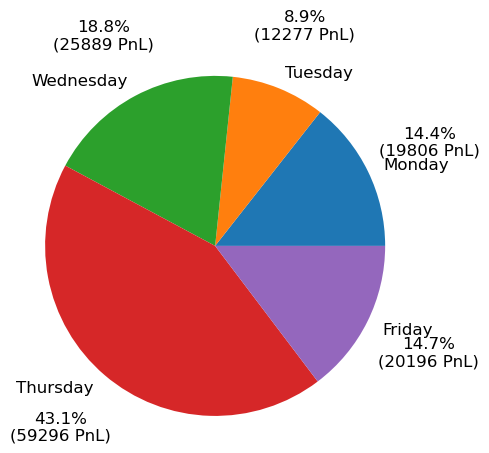

In [97]:
import matplotlib.pyplot as plt

plt.pie(profits, labels = days, autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profits):.0f} PnL)', 
        textprops={"size": 12},
        labeldistance = 1.1, pctdistance = 1.4, radius = 1.15)
#plt.legend(loc="best", bbox_to_anchor=(2.5,0))
plt.show() 

## Weekly Positive Trades

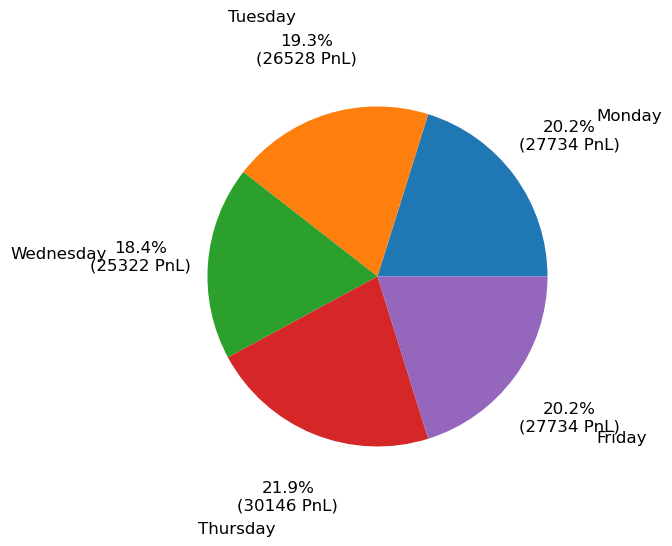

In [98]:
plt.pie(positive_trades, labels = days,  autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profits):.0f} PnL)', textprops={"family": "Arial", "size": 12},
       labeldistance = 1.6, pctdistance = 1.4, radius = 1.15)
plt.show() 

## Weekly Negative Trades

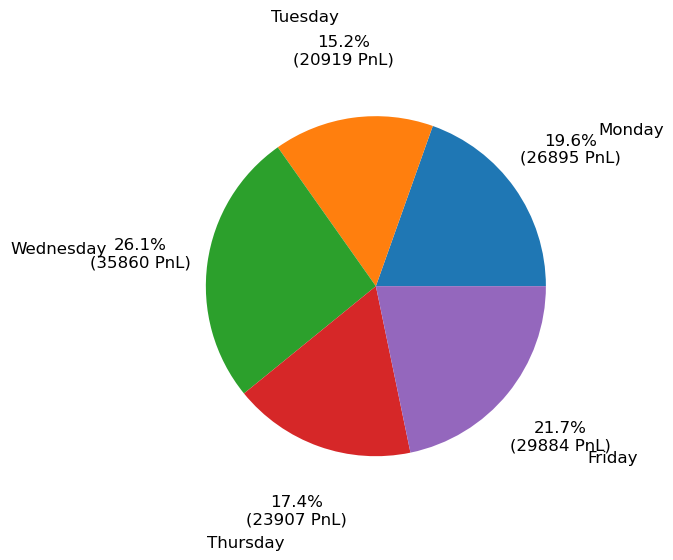

In [99]:
plt.pie(negative_trades, labels = days,  autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profits):.0f} PnL)', textprops={"family": "Arial", "size": 12},
       labeldistance = 1.6, pctdistance = 1.4, radius = 1.15)
plt.show() 

## Monthly Analysis

In [100]:
months = [x.strftime('%B') for x in dates]
df['Months'] = months
df.head() 

,entry_time,index_ltp,call_strike,put_strike,entry_ce_ltp,entry_pe_ltp,call_sl,put_sl,exit_time_call,exit_time_put,...,call_pnl,put_pnl,points_gain,cumulative_points_gain,remark,day_pnl,cumulative_pnl,Date,Days,Months
2021-12-31,2021-12-31 09:20:00,35338.8,BANKNIFTYWK35300CE,BANKNIFTYWK35300PE,417.2,368.0,584.08,515.2,2021-12-31 15:10:00,2021-12-31 15:10:00,...,-74.45,80.1,5.65,5.65,Both legs day end exit,141.25,141.25,2021-12-31 09:20:00,Friday,December
2022-01-03,2022-01-03 09:20:00,35656.8,BANKNIFTYWK35700CE,BANKNIFTYWK35700PE,327.4,334.15,458.36,334.15,2022-01-03 11:14:00,2022-01-03 15:10:00,...,-147.2,236.15,88.95,94.6,Call SL and Put day end exit,2223.75,2365.0,2022-01-03 09:20:00,Monday,January
2022-01-04,2022-01-04 09:20:00,36469.6,BANKNIFTYWK36500CE,BANKNIFTYWK36500PE,283.5,296.4,396.9,296.4,2022-01-04 09:57:00,2022-01-04 15:10:00,...,-125.05,177.9,52.85,147.45,Call SL and Put day end exit,1321.25,3686.25,2022-01-04 09:20:00,Tuesday,January
2022-01-05,2022-01-05 09:20:00,37066.7,BANKNIFTYWK37100CE,BANKNIFTYWK37100PE,178.25,256.65,249.55,256.65,2022-01-05 09:46:00,2022-01-05 15:10:00,...,-87.65,215.1,127.45,274.9,Call SL and Put day end exit,3186.25,6872.5,2022-01-05 09:20:00,Wednesday,January
2022-01-06,2022-01-06 09:20:00,37250.7,BANKNIFTYWK37300CE,BANKNIFTYWK37300PE,151.65,188.05,151.65,263.27,2022-01-06 13:34:00,2022-01-06 09:33:00,...,-30.2,-81.95,-112.15,162.75,Put SL and then Call SL hit,-2803.75,4068.75,2022-01-06 09:20:00,Thursday,January


In [116]:
profits = []

positive_trades = []
negative_trades = []
months = list(set(months))
for month in months:
    print('\n'+month)
    day_df = df[df['Months']==month]
    pnl = day_df["points_gain"].tolist()
    p,n = find(pnl)
    s = sum(pnl*25)
    
    profits.append(s)
    positive_trades.append(p)
    negative_trades.append(n)


April
PnL of trades  :  6031.25
Percentage of PnL of trades:  4.39 %
STD of trades  :  2160.388447561604
Positive trades:  6
Negative trades:  6

September
PnL of trades  :  13815.0
Percentage of PnL of trades:  10.05 %
STD of trades  :  2301.87542953123
Positive trades:  12
Negative trades:  5

May
PnL of trades  :  19953.75
Percentage of PnL of trades:  14.52 %
STD of trades  :  2392.978935815328
Positive trades:  11
Negative trades:  5

February
PnL of trades  :  31032.5
Percentage of PnL of trades:  22.57 %
STD of trades  :  5202.300535502192
Positive trades:  9
Negative trades:  4

October
PnL of trades  :  24101.25
Percentage of PnL of trades:  17.53 %
STD of trades  :  1326.1524704950032
Positive trades:  15
Negative trades:  0

January
PnL of trades  :  1491.25
Percentage of PnL of trades:  1.08 %
STD of trades  :  3325.086052949831
Positive trades:  10
Negative trades:  6

March
PnL of trades  :  11488.75
Percentage of PnL of trades:  8.36 %
STD of trades  :  3519.01168259246

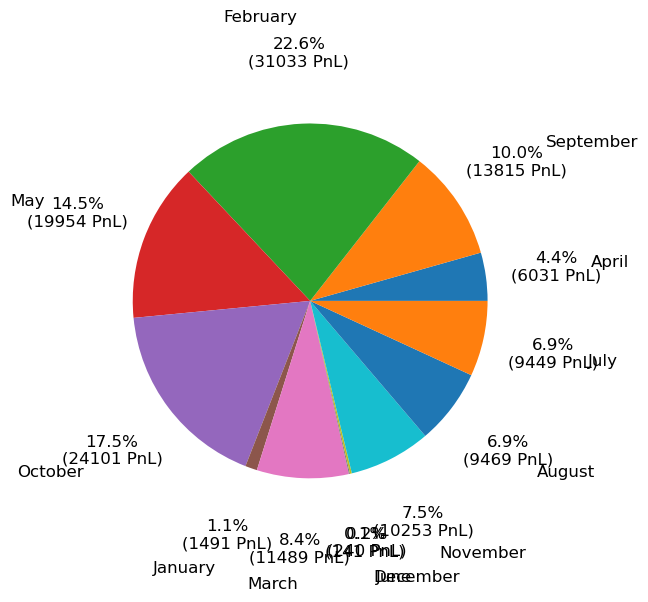

In [102]:
import matplotlib.pyplot as plt

plt.pie(profits, labels = months, autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profits):.0f} PnL)', textprops={"family": "Arial", "size": 12},
       labeldistance = 1.6, pctdistance = 1.4, radius = 1.2)
plt.show() 

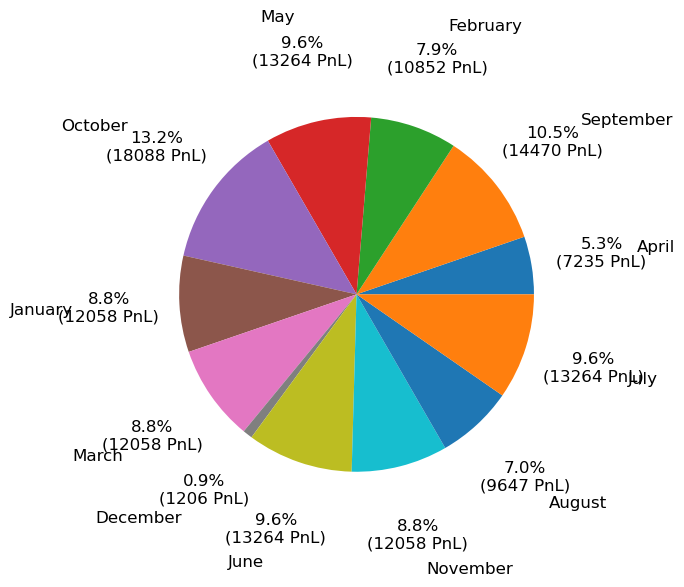

In [103]:
plt.pie(positive_trades, labels = months,  autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profits):.0f} PnL)', textprops={"family": "Arial", "size": 12},
       labeldistance = 1.6, pctdistance = 1.4, radius = 1.2)
plt.show() 

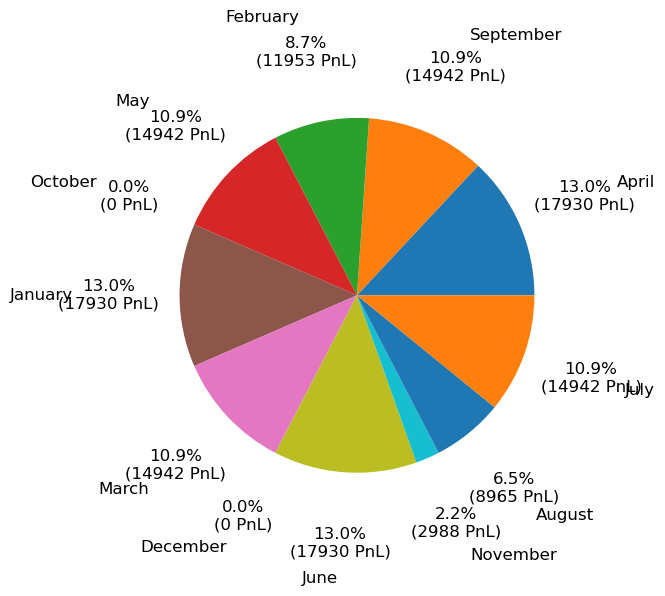

In [104]:
plt.pie(negative_trades, labels = months,  autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(profits):.0f} PnL)', textprops={"family": "Arial", "size": 12},
       labeldistance = 1.6, pctdistance = 1.4, radius = 1.2)
plt.show() 

In [236]:
alphas = df_final_results['day_pnl'].values
mean_alpha = np.mean(alphas)
mean_alpha

34.36624999999999

In [238]:
std_alphas = np.std(alphas)
std_alphas

109.67414043286364

In [267]:
risk_free_rate = (6.5 * 2)/100
risk_free_rate

0.13

In [289]:
return_x = []
capital_deployed = 260000.0
for x in df_final_results['day_pnl'].values:
    x = x * 25
    temp_x = (x/capital_deployed)*100
    return_x.append(temp_x)

In [290]:
alpha = sum(return_x)
alpha

52.871153846153845

In [291]:
stdd = np.std(return_x)
stdd

1.0545590426236893

In [256]:
(alpha - risk_free_rate) / stdd

47.05393613874757

In [239]:
(mean_alpha - risk_free_rate) / std_alphas

0.19481575069265492

In [292]:
sharpe_ratio = ((192600/260000)-risk_free_rate)/stdd
sharpe_ratio

0.5791702560813171

In [ ]:
ltp_provider(data, strike, time)
delta_provider(data, preferred_delta, spot_price, atm_price, tte, rfr, preferred_time, call_put, 
               itm_allowed = False)
calculate_delta(data, index_price, time_to_exp, strike_price, call_put, call_put_price)

In [ ]:
call_iv = implied_volatility_call(spot_price, ce_otm_strike, tte, rfr, otm_ce_ltp)
call_delta = calculate_delta_method1_call(spot_price, ce_otm_strike, rfr, call_iv, tte)

### Old Codes

In [ ]:
for date in unique_days[:]:
    try:
        start_time = str(date)[:10]+" 09:20"
        end_time = str(date)[:10]+" 15:16"
        day_end = str(date)[:10]+" 15:10"
        print('Start time: ', start_time, 'End time: ',end_time)
        intraday_times = [str(x) for x in pd.date_range(start= start_time, end = end_time, freq='min')]

        # Fetch bank nifty index 9:20 close price
        underlying_data = df_bn_index.loc[intraday_times[0]:intraday_times[0]]
        index_ltp = underlying_data['Close'].values[0]
        temp_report["index_ltp"] = index_ltp
        print('Index LTP: ', index_ltp)

        # Find ATM strike with this index LTP
        atm_strike = get_atm(index_ltp)
        print('ATM strike: ', atm_strike)

        # Build the call and put strike price - according to the format
        atm_call = 'BANKNIFTYWK'+str(atm_strike)+'CE'
        atm_put = 'BANKNIFTYWK'+str(atm_strike)+'PE'
        print(f'ATM call strike: {atm_call}, ATM put strike: {atm_put}')
        temp_report['call_strike'] = atm_call
        temp_report['put_strike'] = atm_put
    
        # Find call and put data with this strike price
        df_call = df_options_data[df_options_data['Ticker']== atm_call]
        df_call.index = df_call['Date/Time']
        #print(df_call.head())
        if df_call.empty:
            print('Call data not received')
    
        df_put = df_options_data[df_options_data['Ticker'] == atm_put]
        df_put.index = df_put['Date/Time']
        #print(df_put.head()) 
        if df_put.empty:
            print('Put data not received')
        
        # Loop for the whole day long
        for i in range(len(intraday_times[:])-1):
            #print(intraday_times[i])
            call_data = df_call.loc[intraday_times[i]:intraday_times[i]]
            put_data = df_put.loc[intraday_times[i]:intraday_times[i]]
            call_ltp = call_data['Close'].values[0]
            put_ltp = put_data['Close'].values[0]
            #print(f"Time: {intraday_times[i]}, Call ltp: {call_ltp}, Put ltp: {put_ltp}")

            # This process continues till day end. 
            if day_end_flag == 0:
                lst_each_time.append(intraday_times[i])
                lst_ce_ltp.append(call_ltp)
                lst_pe_ltp.append(put_ltp)
                lst_day_pnl.append(day_pnl)
                lst_cum_pnl.append(cum_pnl)
                #temp_report['time'] = intraday_times[i]
                #temp_report['ce_ltp'] = call_ltp
                #temp_report['pe_ltp'] = put_ltp
                #temp_report['day_pnl'] = day_pnl
                #temp_report['cum_pnl'] = cum_pnl
            
            # Enter into straddle at 9:20 and exit at 15:20
            # This is a one time entry strategy. After SL, we'll stop trading for that day
            if ( (straddle_flag == 0) and (day_end_flag == 0) and (one_time_flag == 0) ):
                print('Entry to straddle at: ', intraday_times[i])
                print(f'Straddle Call price {call_ltp}, put price {put_ltp}')
                std_call_ltp = call_ltp
                std_put_ltp = put_ltp
                straddle_flag = 1
                one_time_flag = 1
                temp_report['time'] = intraday_times[i]
                temp_report['entry_ce_ltp'] = call_ltp
                temp_report['entry_pe_ltp'] = put_ltp
                trade_num += 1
                
            if ( (straddle_flag == 1) and (day_end_flag == 0) and (one_time_flag != 0)):
                # check for SL, if any ltp reaches 30%, then square off both leg
                call_m2m = round(std_call_ltp - call_ltp, 2)
                put_m2m = round(std_put_ltp - put_ltp, 2)
                all_m2m.append(round(call_m2m + put_m2m, 2))
                lst_put_m2m.append(put_m2m)
                lst_call_m2m.append(call_m2m)
                #print(f"Call m2m: {call_m2m}, put m2m: {put_m2m}")
                #print(f"Time: {intraday_times[i]}, Call ltp: {call_ltp}, Put ltp: {put_ltp}")
                
                # Call SL hit
                if call_ltp > 1.3*std_call_ltp: 
                    # call sl hit
                    print(f"Call sl hit, time: {intraday_times[i]}, call m2m: {call_m2m}, put m2m: {put_m2m}")
                    print(f"call ltp: {call_ltp}, put ltp: {put_ltp}")
                    day_pnl = round((std_call_ltp - call_ltp) + (std_put_ltp - put_ltp), 2)
                    print(f'Day pnl: {day_pnl}')
                    temp_report['exit_ce_ltp'] = call_ltp
                    temp_report['exit_pe_ltp'] = put_ltp
                    temp_report['day_pnl'] = day_pnl
                    straddle_flag = 0
                    std_call_ltp = 0
                    std_put_ltp = 0
                    lst_status.append('-1')
                    temp_report['status'] = -1
                    temp_report['remark'] = "Call SL hit"
                    
                # Put SL hit
                if ( (put_ltp > 1.3*std_put_ltp) and (straddle_flag != 0) ):
                    # put sl hit
                    print(f"Put sl hit, time: {intraday_times[i]}, call m2m: {call_m2m}, put m2m: {put_m2m}")
                    print(f"call ltp: {call_ltp}, put ltp: {put_ltp}")
                    day_pnl = round((std_call_ltp - call_ltp) + (std_put_ltp - put_ltp), 2)
                    print(f'Day pnl: {day_pnl}')
                    temp_report['exit_ce_ltp'] = call_ltp
                    temp_report['exit_pe_ltp'] = put_ltp
                    temp_report['day_pnl'] = day_pnl
                    straddle_flag = 0
                    std_call_ltp = 0
                    std_put_ltp = 0
                    lst_status.append('-1')
                    temp_report['status'] = -1
                    temp_report['remark'] = "Put SL hit"
                    
                # Day end Exit
                if ( (intraday_times[i] >= day_end) and (straddle_flag != 0)):
                    print(f'Day end exit, time: {intraday_times[i]}')
                    print(f"call ltp: {call_ltp}, put ltp: {put_ltp}")
                    day_pnl = round((std_call_ltp - call_ltp) + (std_put_ltp - put_ltp), 2)
                    print(f'Day pnl: {day_pnl}')
                    temp_report['exit_ce_ltp'] = call_ltp
                    temp_report['exit_pe_ltp'] = put_ltp
                    temp_report['day_pnl'] = day_pnl
                    straddle_flag = 0
                    std_call_ltp = 0
                    std_put_ltp = 0
                    day_end_flag = 1
                    temp_report['status'] = 2
                    temp_report['remark'] = "Day end Exit"
    
        # Save trade status to a dataframe
        cum_pnl += day_pnl
        cum_pnl = round(cum_pnl, 2)
        temp_report['cum_pnl'] = cum_pnl
        final_result[trade_num] = temp_report
        
        # After saving, reset the report and other variables
        temp_report = {'time':None, 'index_ltp' : None, 'call_strike':None, 'put_strike':None,
               'entry_ce_ltp':None, 'entry_pe_ltp':None, 'exit_ce_ltp':None, 'exit_pe_ltp':None,
               'day_pnl':None, 'cum_pnl':None,'status':None, 'remark':None}
        straddle_flag = 0
        day_end_flag = 0
        one_time_flag = 0
        std_call_ltp = 0
        std_put_ltp = 0
        

        
        # Save day end pnl to cumulative pnl
        
        day_pnl = 0
        print('Cumulative pnl: ', cum_pnl)
        print('\n')
    
    
    except Exception as e:
        print(f'Error {e}')

In [ ]:
pd.DataFrame(final_result).T.to_csv('./Straddle_Reports/Bnf_straddle_31Dec_6Jan.csv', index = False)

In [ ]:
def delta_provider(data, preferred_delta, spot_price, atm_price, tte, rfr, preferred_time, call_put, itm_allowed = False):  # Return a strike price with given preferred delta value
    chosen_strike, chosen_strike_ltp, chosen_strike_delta = [], [], []
    if call_put == 'CE':
        for i in range(10):
            ce_otm_strike = atm_strike + i * 100
            otm_call = 'BANKNIFTY'+str(ce_otm_strike)+'CE'
            df_ce_otm = data[data['Ticker'] == otm_call]
            df_ce_otm.index = df_ce_otm['Date/Time']
            otm_ce_ltp = df_ce_otm.loc[preferred_time:preferred_time]['Close'].values[0]
            #print('Delta parameters: ', spot_price, ce_otm_strike, tte, rfr, otm_ce_ltp)
            call_iv = implied_volatility_call(spot_price, ce_otm_strike, tte, rfr, otm_ce_ltp)
            call_delta = calculate_delta_method1_call(spot_price, ce_otm_strike, rfr, call_iv, tte)
            #print('Strike price: ', ce_otm_strike,' Call iv: ', call_iv, ' call delta: ', call_delta)
            chosen_strike.append(otm_call)
            chosen_strike_ltp.append(otm_ce_ltp)
            chosen_strike_delta.append(call_delta)
            
        if itm_allowed:
            #print('Searching in the ITM too')
            for i in range(1, 8):
                ce_itm_strike = atm_strike - i * 100
                itm_call = 'BANKNIFTY'+str(ce_itm_strike)+'CE'
                df_ce_itm = data[data['Ticker'] == itm_call]
                df_ce_itm.index = df_ce_itm['Date/Time']
                itm_ce_ltp = df_ce_itm.loc[preferred_time:preferred_time]['Close'].values[0]
                #print('Delta parameters: ', spot_price, ce_itm_strike, tte, rfr, itm_ce_ltp)
                call_iv = implied_volatility_call(spot_price, ce_itm_strike, tte, rfr, itm_ce_ltp)
                call_delta = calculate_delta_method1_call(spot_price, ce_itm_strike, rfr, call_iv, tte)
                chosen_strike.insert(0, itm_call)
                chosen_strike_ltp.insert(0, itm_ce_ltp)
                chosen_strike_delta.insert(0, call_delta)
        #print('Possible strikes CE: ', chosen_strike, chosen_strike_ltp, chosen_strike_delta)   # chosen strikes and their ltp 
        
        if len(chosen_strike) > 0:
            final_ce_otm = chosen_strike[0]
            final_ce_otm_ltp = chosen_strike_ltp[0]
            final_ce_delta = chosen_strike_delta[0]
            min_diff = abs(preferred_delta - final_ce_delta)
        for i in range(1, len(chosen_strike)):
            if (abs(preferred_delta - chosen_strike_delta[i]) < min_diff):
                final_ce_otm = chosen_strike[i]
                final_ce_otm_ltp = chosen_strike_ltp[i]
                final_ce_delta = chosen_strike_delta[i]
                min_diff = abs(preferred_delta - chosen_strike_delta[i])
        #print(f"Final ce otm: {final_ce_otm}, LTP: {final_ce_otm_ltp}, Delta: {final_ce_delta}")
        return final_ce_otm, final_ce_otm_ltp, final_ce_delta
    
    if call_put == 'PE':
        for i in range(10):
            pe_otm_strike = atm_strike - i * 100
            otm_put = 'BANKNIFTY'+str(pe_otm_strike)+'PE'
            df_pe_otm = data[data['Ticker'] == otm_put]
            df_pe_otm.index = df_pe_otm['Date/Time']
            otm_pe_ltp = df_pe_otm.loc[preferred_time:preferred_time]['Close'].values[0]
            #print('Delta parameters at PE: ', spot_price, pe_otm_strike, tte, rfr, otm_pe_ltp)
            put_iv = implied_volatility_put(spot_price, pe_otm_strike, tte, rfr, otm_pe_ltp)
            put_delta = abs(calculate_delta_method1_put(spot_price, pe_otm_strike, rfr, put_iv, tte))
            chosen_strike.append(otm_put)
            chosen_strike_ltp.append(otm_pe_ltp)
            chosen_strike_delta.append(put_delta)
        if itm_allowed:
            #print('Searching in ITM too')
            for i in range(1, 5):
                pe_itm_strike = atm_strike + i * 100
                itm_put = 'BANKNIFTY'+str(pe_itm_strike)+'PE'
                df_pe_itm = data[data['Ticker'] == itm_put]
                df_pe_itm.index = df_pe_itm['Date/Time']
                itm_pe_ltp = df_pe_itm.loc[preferred_time:preferred_time]['Close'].values[0]
                put_iv = implied_volatility_put(spot_price, pe_itm_strike, tte, rfr, itm_pe_ltp)
                put_delta = abs(calculate_delta_method1_put(spot_price, pe_itm_strike, rfr, put_iv, tte))
                chosen_strike.insert(0, itm_put)
                chosen_strike_ltp.insert(0, itm_pe_ltp)
                chosen_strike_delta.insert(0, put_delta)
        #print('Possible strike PE: ', chosen_strike, chosen_strike_ltp, chosen_strike_delta)
        if len(chosen_strike) > 0:
            final_pe_otm = chosen_strike[0]
            final_pe_otm_ltp = chosen_strike_ltp[0]
            final_pe_delta = chosen_strike_delta[0]
            min_diff = abs(preferred_delta - final_pe_delta)
        for i in range(1, len(chosen_strike)):
            if (abs(preferred_delta - chosen_strike_delta[i]) < min_diff):
                final_pe_otm = chosen_strike[i]
                final_pe_otm_ltp = chosen_strike_ltp[i]
                final_pe_delta = chosen_strike_delta[i]
                min_diff = abs(preferred_delta - chosen_strike_delta[i])
        #print(f"Final pe otm: {final_pe_otm}, LTP: {final_pe_otm_ltp}, Delta: {final_pe_delta}")
        return final_pe_otm, final_pe_otm_ltp, final_pe_delta
            
    



In [ ]:
delta_provider_with_gap(data, preferred_gap, spot_price, atm_price, tte, rfr, preferred_time, call_put)

In [ ]:
def implied_volatility_call(S, X, T, r, call_price, sigma_estimate=0.2, tol=1e-5, max_iter=1000):
def implied_volatility_put(S, X, T, r, put_price, sigma_estimate=0.2, tol=1e-5, max_iter=1000):
    
def calculate_delta_method1_call(S, X, r, sigma, T):
def calculate_delta_method1_put(S, X, r, sigma, T):    